# Plotting Vr by EPI Characteristics Files

In [7]:
import netCDF4
from netCDF4 import Dataset

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.colors import Normalize
import matplotlib.dates as md

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

import numpy as np

import pandas as pd

import glob 

import datetime
from datetime import datetime

import math as m

import xarray as xr

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [8]:
path=[]

# Vr within EPI Layers by strength files
EPIfiles=sorted(glob.glob(path + '*.csv'))
EPIfiles

# Vr in stable layers file
stablefile=path+allstable_vr.csv'

# EPI Layers

In [15]:
EPIlst=[]
for n in range(len(EPIfiles)):
    print(EPIfiles[n])
    EPIlst.append(pd.read_csv(EPIfiles[n]).iloc[:,1::].values[:][:,0])

/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-1 to 0Final_above1km_boxa.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-1 to 0Final_above1km_boxb.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-2 to -1Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-3 to -2Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-4 to -3Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-5 to -4Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-6 to -5Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-7 to -6Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-8 to -7Final_above1km_box.csv
/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/EPIBins_Data/Vr/-9 to -8Final_above1km_box.csv


In [16]:
EPIbigarr=np.concatenate(EPIlst)

In [17]:
binnames=['0- -1', '-1 to -2', '-2 to -3', '-3 to -4', '-4 to -5', '-5 to -6', '-6 to -9']

In [18]:
zero_1=np.concatenate([EPIlst[0], EPIlst[1]])
two_1=EPIlst[2]
three_2=EPIlst[3]
four_3=EPIlst[4]
five_4=EPIlst[5]
six_5=EPIlst[6]
six_9=np.concatenate([EPIlst[7], EPIlst[8], EPIlst[9]])

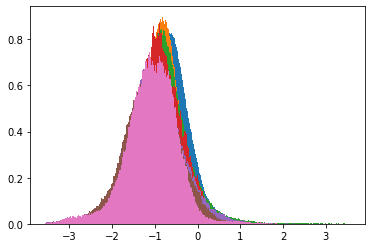

In [20]:
EPIbinlst=[zero_1, two_1, three_2, four_3, five_4, six_5, six_9]

binscountslst=[]
binsbinslst=[]
for n in range(len(EPIbinlst)):
    vrbin=EPIbinlst[n]
    
    bincounts, binbins, binp= plt.hist(vrbin, bins=np.arange(-3.56,3.57,.01),density=True)
    
    binscountslst.append(bincounts)
    binsbinslst.append(binbins)

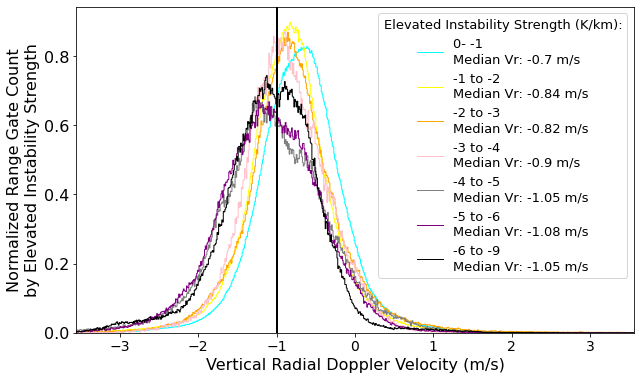

In [54]:
fig, ax=plt.subplots(figsize =(10, 6))
plt.xlim(-3.56,3.56)
ax.tick_params(labelsize=14)
ax.set_xlabel('Vertical Radial Doppler Velocity (m/s)', fontsize=16)
ax.set_ylabel('Normalized Range Gate Count\nby Elevated Instability Strength', fontsize=16)
ax.tick_params(labelsize=16, axis='y')

#plt.title('Vr in EPI Layers Above 1 km in 2020 and 2022 FLs', fontsize=20)


EPIbinlst=[zero_1, two_1, three_2, four_3, five_4, six_5, six_9]
colors=['cyan','yellow','orange','pink','grey','purple','black']
for n in range(len(EPIbinlst)):
    vrbin=EPIbinlst[n]
    
    plt.stairs(binscountslst[n], binsbinslst[n], color=colors[n], label=binnames[n]+'\nMedian Vr: '+str(np.round(np.nanmedian(vrbin),2))+str(' m/s'))
    plt.axvline(-1, c='k')
    #plt.axvline(np.nanmedian(vrbin), c=colors[n], linestyle='--', label=binnames[n]+' Median: '+str(np.round(np.nanmedian(vrbin),2)))
    
    plt.legend(title='Elevated Instability Strength (K/km):', title_fontsize=13, fontsize=13, markerscale=10)

# Stable

In [38]:
stablefile

'/data/pecan/a/kheimes2/ProcessedIMPACTSWRadar_V2/allstable_vr.csv'

In [39]:
stablebigarr=pd.read_csv(stablefile).iloc[:,1::].values[:][:,0]

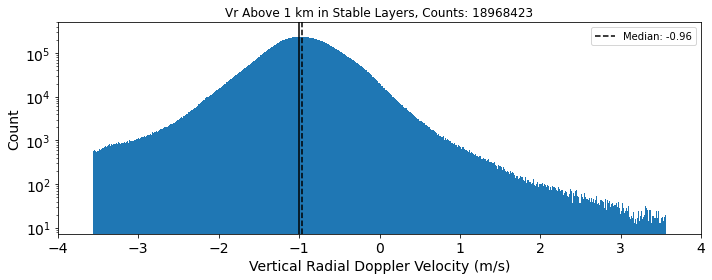

In [19]:
fig, ax=plt.subplots(figsize =(10, 4))
plt.hist(stablebigarr, range=(-4,4),bins=1000)

plt.axvline(-1, c='k')
plt.axvline(np.nanmedian(stablebigarr), c='k', linestyle='--', label='Median: '+str(np.round(np.nanmedian(stablebigarr),2)))

plt.legend()
plt.yscale('log')

plt.xlim(-4,4)
plt.ylim(0,5*10**5)

ax.tick_params(labelsize=14)
ax.set_xlabel('Vertical Radial Doppler Velocity (m/s)', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.tick_params(labelsize=14, axis='y')

#plt.title('Vr Above 1 km Between NS and EC Stable Layers, Counts: '+ str(len(np.where(np.isnan(stablebigarr)==True)[0])))
plt.title('Vr Above 1 km in Stable Layers, Counts: '+ str(len(np.where(np.isnan(stablebigarr)==True)[0])))

plt.tight_layout()

# EPI and Stable Layers

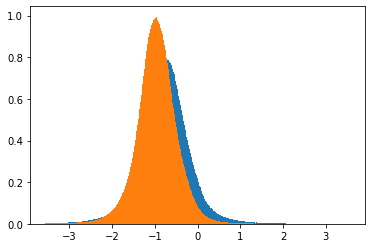

In [40]:
EPIcounts, EPIbins, EPIp= plt.hist(EPIbigarr, bins=np.arange(-3.56,3.57,.01),density=True)
stablecounts, stablebins, stablep= plt.hist(stablebigarr, bins=np.arange(-3.56,3.57,.01),density=True)

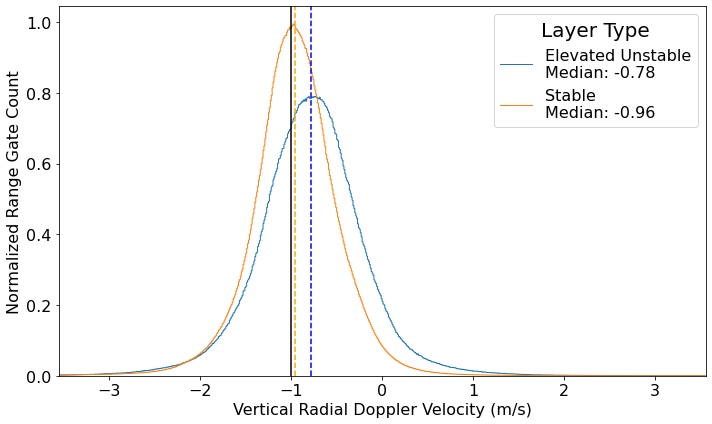

In [56]:
fig, ax=plt.subplots(figsize =(10, 6))
plt.stairs(EPIcounts, EPIbins, label='Elevated Unstable\nMedian: '+str(np.round(np.nanmedian(EPIbigarr),2)))
plt.stairs(stablecounts, stablebins, label='Stable\nMedian: '+str(np.round(np.nanmedian(stablebigarr),2)))

plt.axvline(-1, c='k')
plt.axvline(np.nanmedian(EPIbigarr), c='blue', linestyle='--')#, label='Median: '+str(np.round(np.nanmedian(EPIbigarr),2)))
plt.axvline(np.nanmedian(stablebigarr), c='orange', linestyle='--')#, label='Median: '+str(np.round(np.nanmedian(stablebigarr),2)))

plt.legend(title='Layer Type', title_fontsize=20,fontsize=16, markerscale=10)
#plt.yscale('log')

plt.xlim(-3.56,3.56)
#plt.ylim(0,5*10**5)

ax.tick_params(labelsize=16)
ax.set_xlabel('Vertical Radial Doppler Velocity (m/s)', fontsize=16)
ax.set_ylabel('Normalized Range Gate Count', fontsize=16)
ax.tick_params(labelsize=16, axis='y')

#plt.title('Vr in Layers Above 1 km in 2020 and 2022 FLs', fontsize=20)

plt.tight_layout()